In [2]:
import nolds
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk


# Playing Around with Basic Concepts

In [3]:
rwalk = np.random.random(170)
h = nolds.dfa(rwalk)

In [4]:
h

0.5668608842237691

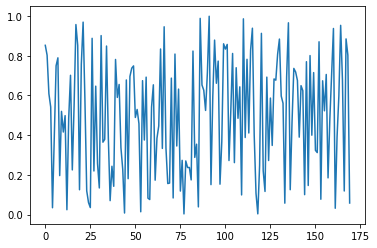

In [5]:
plt.plot(rwalk)

In [6]:
nolds.sampen(rwalk)

2.7140925155581725

In [7]:
nolds.corr_dim(rwalk,2)

1.316027167213556

In [8]:
2-h

1.433139115776231

In [9]:
H, c, data = compute_Hc(rwalk, kind='change', simplified=False)
H

0.748312332888011

H =  0.47236482389727563
hp = 1.3786054133928605


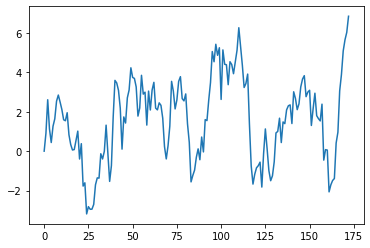

In [10]:
lowh = random_walk(173, proba=0.3)
plt.plot(lowh)
H, c, data = compute_Hc(lowh, kind='random_walk', simplified=False)
print('H = ', H)
hp = nolds.dfa(lowh)
print('hp =', hp)

H =  0.5943823261839575
hp = 0.5430265917027506


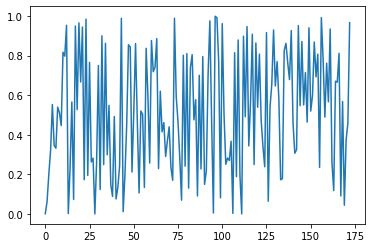

In [41]:
rwalk = np.random.random(173)
plt.plot(rwalk)
H, c, data = compute_Hc(rwalk, kind='change', simplified=False)
print('H = ', H)
hp = nolds.dfa(rwalk)
print('hp =', hp)

H = 0.5357517230354075
hp = 1.604960647493881


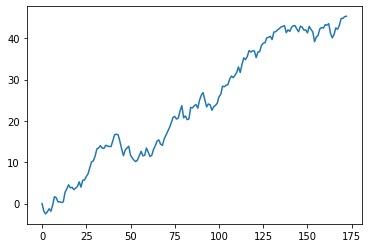

In [12]:
brownian = random_walk(173, proba=0.7)
plt.plot(brownian)
H, c, data = compute_Hc(brownian, kind='random_walk', simplified=False)
print('H =', H)
hp = nolds.dfa(brownian)
print('hp =', hp)

# Power Spectrum and Decade Calculation

In [76]:
import os
import math
import statistics

In [14]:
import nibabel as nib

In [15]:
from scipy import signal

In [77]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((statistics.mean(xs)*statistics.mean(ys)) - statistics.mean(xs*ys)) /
         ((statistics.mean(xs)*statistics.mean(xs)) - statistics.mean(xs*xs)))
    
    b = statistics.mean(ys) - m*statistics.mean(xs)
    
    return m, b


In [73]:
np.log(freqs[1:])
np.log(psd[1:])

array([-1.86227024, -3.90465472, -3.68994037, -2.6255013 , -1.5605764 ,
       -2.12213246, -3.4685825 , -2.52592839, -1.40518041, -0.91575548,
       -1.31678672, -4.77194425, -1.87610088, -1.52403441, -1.84978906,
       -2.09493006, -6.30623757, -2.1971572 , -2.70197897, -4.44191878,
       -2.31155038, -1.62732467, -2.7044677 , -3.28020839, -2.86606178,
       -3.59429419, -2.73335549, -3.92557277, -2.7976578 , -2.08100379,
       -2.24378791, -7.73677282, -1.83762427, -1.19694502, -1.54954765,
       -1.86199475, -1.27318238, -0.81261625, -0.92918975, -1.38705552,
       -1.9225598 , -1.19462986, -1.81813158, -0.57877839, -0.18140724,
       -1.81990204, -4.67199855, -2.3277767 , -0.84397981, -2.38127242,
       -2.70364274, -1.62478364, -1.35242785, -2.22361929, -5.38119546,
       -1.69445103, -2.21002694, -3.63677124, -2.68378806, -2.67402994,
       -2.78194866, -4.05862535, -2.01993363, -2.28542525, -5.77594661,
       -1.78641584, -1.31663752, -2.96610545, -1.75915087, -0.49

m and b: 0.16337402716328298 -2.100928678171108
H =  0.5816870135816414
1.9344984512435677


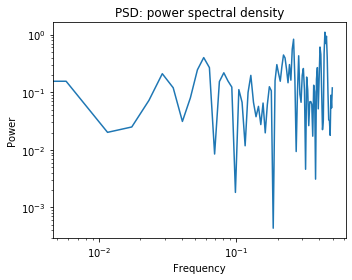

In [94]:
freqs, psd = signal.welch(rwalk)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()



m, b = best_fit_slope_and_intercept(np.log(freqs[1:]),np.log(psd[1:]))
print("m and b:", m, b)

print("H = ", (m+1)/2)

print(math.log10(max(freqs)/freqs[1]))

m and b: -1.9415704392620667 -3.03334162400777
1.9344984512435677
H =  -1.4415704392620667


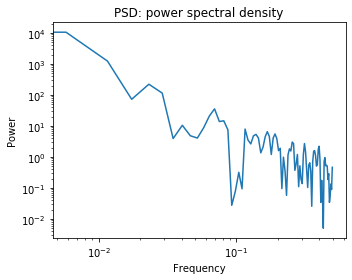

In [93]:
freqs, psd = signal.welch(brownian)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
m, b = best_fit_slope_and_intercept(np.log(freqs[1:]),np.log(psd[1:]))
print("m and b:", m, b)
print(math.log10(max(freqs)/freqs[1]))
print("H = ", (m+1/2))

m and b: -1.575612741710861 -2.4962043553721567
H =  -1.075612741710861
1.9344984512435677


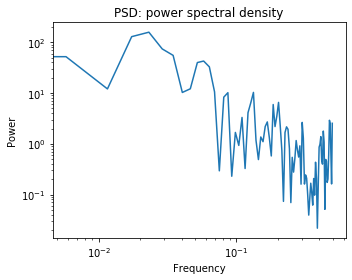

In [95]:
freqs, psd = signal.welch(lowh)
m, b = best_fit_slope_and_intercept(np.log(freqs[1:]),np.log(psd[1:]))
print("m and b:", m, b)
ypred = m*np.log(freqs[1:]) + b

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.yscale('log')
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

print("H = ", (m+1/2))

print(math.log10(max(freqs)/freqs[1]))

In [43]:
math.log10(173/1)

2.2380461031287955